In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

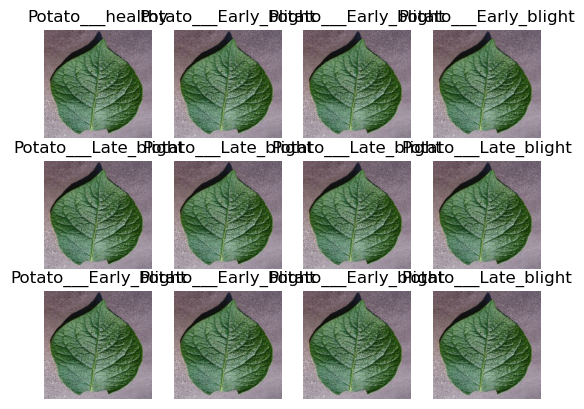

In [7]:
for image_batch, label_batch in dataset.take(1):
    for i in range (12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [8]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [9]:
train_ds = dataset.take(54)
len(train_ds)

54

In [10]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [11]:
val_size = 0.1 
len(dataset)*val_size

6.800000000000001

In [12]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [13]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000 ) :
    
        ds_size = len(ds)
        if shuffle : 
            ds = ds.shuffle(shuffle_size, seed=12)
        train_size = int(train_split * ds_size)
        val_size = int(val_split * ds_size)
        
        train_ds = ds.take(train_size)
        
        val_ds = ds.skip(train_size).take(val_size)
        test_ds = ds.skip(train_size).skip(val_size)
        
        return train_ds, val_ds, test_ds
        

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
len(train_ds)

54

In [17]:
len(val_ds)

6

In [18]:
len(test_ds)

8

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [21]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [22]:
input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation, 
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
]) 
model.build(input_shape=input_shape)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
history= model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data=val_ds

)

Epoch 1/50
54/54 [==============================] - 68s 1s/step - loss: 0.9189 - accuracy: 0.4769 - val_loss: 0.8876 - val_accuracy: 0.4688
Epoch 2/50
54/54 [==============================] - 65s 1s/step - loss: 0.7482 - accuracy: 0.6528 - val_loss: 0.6421 - val_accuracy: 0.6979
Epoch 3/50
54/54 [==============================] - 66s 1s/step - loss: 0.5194 - accuracy: 0.7627 - val_loss: 0.5021 - val_accuracy: 0.7865
Epoch 4/50
54/54 [==============================] - 67s 1s/step - loss: 0.3691 - accuracy: 0.8432 - val_loss: 0.3993 - val_accuracy: 0.8646
Epoch 5/50
54/54 [==============================] - 71s 1s/step - loss: 0.3761 - accuracy: 0.8461 - val_loss: 0.3090 - val_accuracy: 0.8646
Epoch 6/50
54/54 [==============================] - 67s 1s/step - loss: 0.2678 - accuracy: 0.8987 - val_loss: 0.3190 - val_accuracy: 0.8750
Epoch 7/50
54/54 [==============================] - 67s 1s/step - loss: 0.2452 - accuracy: 0.9057 - val_loss: 0.2476 - val_accuracy: 0.9062
Epoch 8/50
54/54 [==

In [26]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 3s 268ms/step - loss: 0.0279 - accuracy: 0.9961


In [27]:
scores

[0.027863474562764168, 0.99609375]

In [28]:
history

In [29]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
history.history['accuracy']

[0.47685185074806213,
 0.6527777910232544,
 0.7627314925193787,
 0.8431712985038757,
 0.8460648059844971,
 0.8987268805503845,
 0.9056712985038757,
 0.9137731194496155,
 0.9351851940155029,
 0.9328703880310059,
 0.9577546119689941,
 0.9583333134651184,
 0.9658564925193787,
 0.9623842835426331,
 0.9728009104728699,
 0.9728009104728699,
 0.9756944179534912,
 0.9762731194496155,
 0.9803240895271301,
 0.9797453880310059,
 0.9855324029922485,
 0.9646990895271301,
 0.9710648059844971,
 0.9837962985038757,
 0.9866898059844971,
 0.9751157164573669,
 0.9791666865348816,
 0.9901620149612427,
 0.9745370149612427,
 0.9751157164573669,
 0.9849537014961243,
 0.9861111044883728,
 0.984375,
 0.9699074029922485,
 0.9837962985038757,
 0.9739583134651184,
 0.9924768805503845,
 0.9866898059844971,
 0.984375,
 0.9942129850387573,
 0.9866898059844971,
 0.9884259104728699,
 0.9930555820465088,
 0.9924768805503845,
 0.9953703880310059,
 0.9965277910232544,
 0.9953703880310059,
 0.9762731194496155,
 0.99305558

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

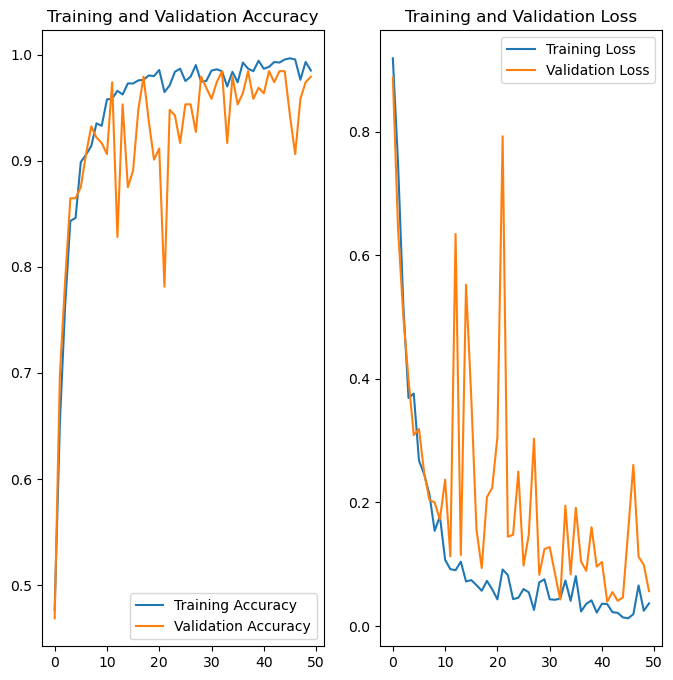

In [33]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


first image to predict
first image's actual label: Potato___Late_blight
1/1 [==============================] - 0s 401ms/step
predicted label : Potato___Late_blight


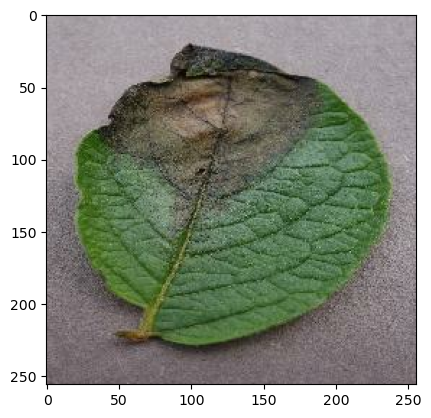

In [34]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label :",class_names[np.argmax(batch_prediction[0])])

In [35]:
 np.argmax([9.999969e-01,3.050913e-06,8.150088e-19])

0

In [36]:
def predict (model , img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 27ms/step


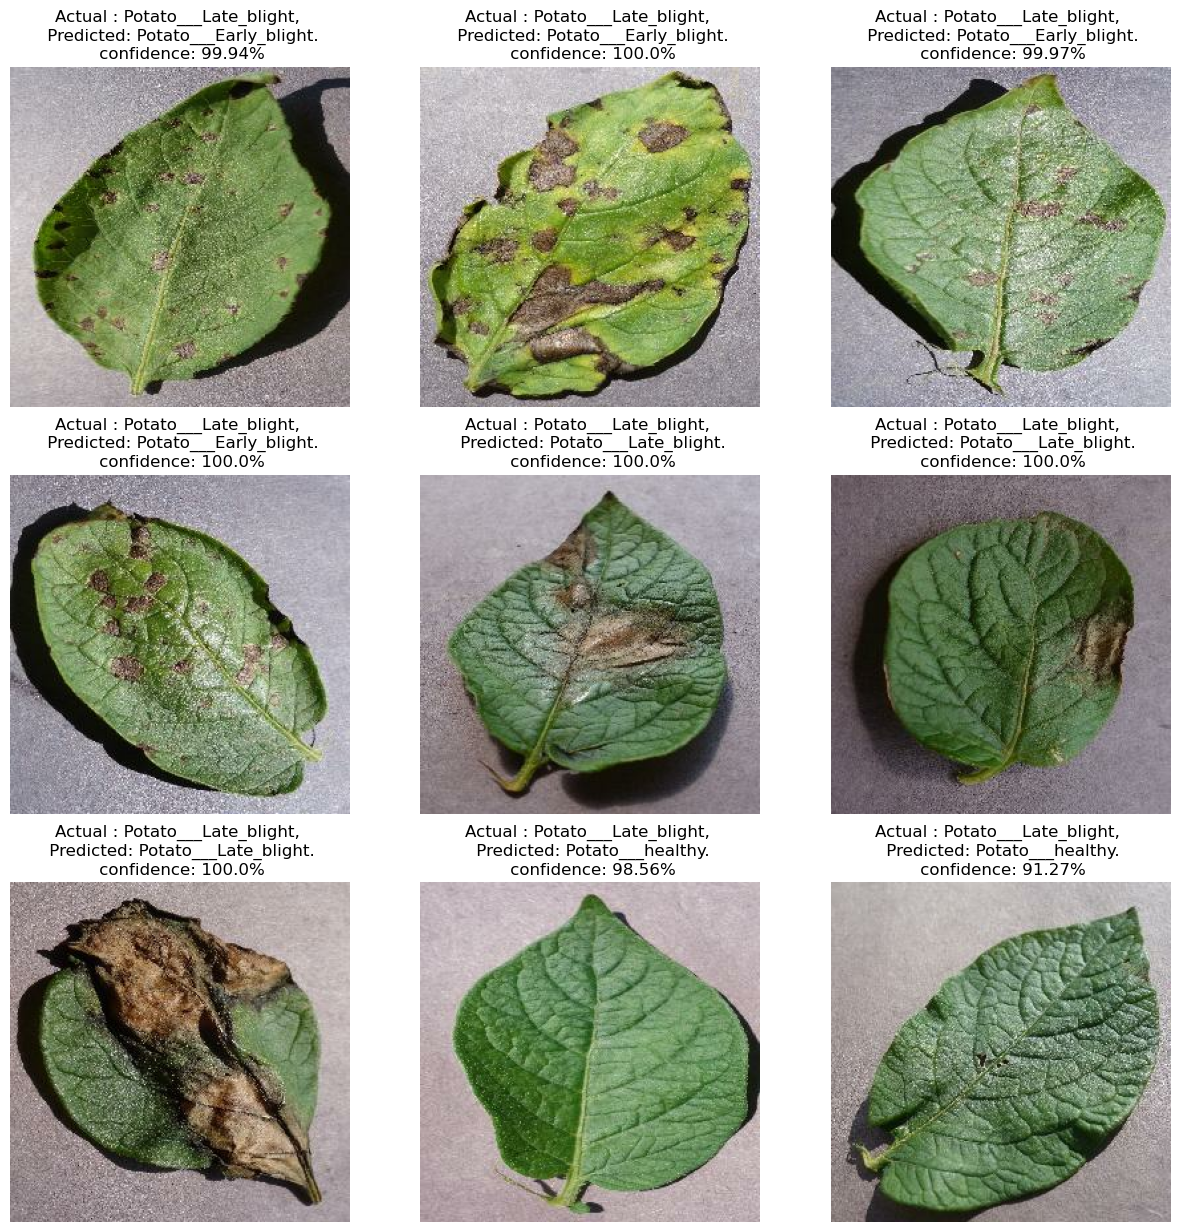

In [37]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range (9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        
        plt.title(f"Actual : {class_names[first_label]}, \n Predicted: {predicted_class}.\n confidence: {confidence}%")
        
        plt.axis("off")

In [40]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [39]:
import os 
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/3\assets


INFO:tensorflow:Assets written to: ../models/3\assets
